<a href="https://colab.research.google.com/github/KRohit2007/GNCIPL-PROJECT-1/blob/main/GS_HT_WEEK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT TITLE-** GLOBAL SUICIDE/ HAPPINESS TRENDS

**PROJECT TYPE-** GLOBAL DEVELOPMENT AND SUSTAINABILITY

**PROJECT SUMMARY-**
This project explores the World Happiness Report dataset, which ranks countries by their happiness levels based on citizen responses and well-being metrics. The core objective is to analyze the various factors influencing happiness scores globally and extract meaningful insights through data cleaning, exploratory analysis, and visualization.

**DESCRIPTION-**

Examine
social wellbeing or
mental health
indicators by
country.

**MAIN OBJECTIVE:**

Highlight
concerning patterns across
demographics or
regions

**Key Objectives:**

A)  **Load and preprocess** the dataset to ensure quality analysis.

B) Investigate the distribution of the **main metric, the Happiness Score, across countries and regions**.

C) Examine **relationships and correlations** between **happiness** and **key factors** including:

1. **Economy (GDP per Capita)**

2. **Family and Social Support**

3. **Health (Life Expectancy)**

4. **Freedom**

5. **Trust in Government (Perceptions of corruption)**

6. **Generosity**  

D) Detect and analyze **outliers using interquartile** range methods.

E) Visualize data through **multiple forms such as histograms, boxplots, scatterplots, bar charts, and interactive plots** to communicate findings effectively.

F) Perform **regional comparisons** and understand how different parts of the world differ in happiness drivers.

G) Use **correlation matrices** **and trend analysis** to highlight which factors most strongly associate with higher happiness levels.

**Tools and Techniques:**


A) Data handling and preparation with **pandas**.

B)Visualization with **Matplotlib, Seaborn for static plots**.

C) Interactive visualization using** Plotly Express** for stakeholder-friendly exploration.

D) Statistical techniques like **IQR for outlier detection**.

E)**Correlation and regression analyses** to identify key drivers of happiness.


**Outcome:**

A) Identified that economic prosperity (GDP per capita), social support (family), and health significantly influence happiness.

B) Demonstrated the importance of freedom and trust in government as additional contributors.

C) Provided a comprehensive EDA dashboard-like overview suitable for policy-making, academic research, or public awareness.

D) Prepared a comprehensive story around global well-being for strategic decision-making and fostering societal progress.






**CODE IMPLEMENTATION STARTS FROM HERE FOR THE WEEK1 PROJECT**


IMPORTING NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA



DATASET LOADING


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path =  '/content/drive/MyDrive/2015.csv'

Mounted at /content/drive


READING THE FILE AND COPYING THE DATASET FOR CLEANING

In [5]:
#READING THE FILE
df = pd.read_csv(path)

#copying the dataset for cleaning
df_clean = df.copy()



HERE WE ARE GOING TO HAVE A LOOK AT THE STRUCTURE OF DATASET

In [6]:
#dataset first look by deciding to print the first 10 data
print("The structure of the dataset on which we have to work\n This is the first look of the dataset\n -----------------------------------------------------------------------\n ")
df_clean.head(10)


The structure of the dataset on which we have to work
 This is the first look of the dataset
 -----------------------------------------------------------------------
 


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


PRINTING NUMBER OF ROWS AND COLUMNS IN THE DATASET

In [7]:
# printing the no of columns and rows
print("count of number of coloumns in the data set is:" ,len(df_clean.columns.tolist())) # to print the no of coloumns
print("count of number of coloumns in the data set is:",len(df_clean)) # to print the no of data collected

count of number of coloumns in the data set is: 12
count of number of coloumns in the data set is: 158


DATA SET INFORMATION

In [8]:
#to print the info of dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

TO CHECK IF THE DATA SET ISEMPTY OR NOT

In [9]:
#code to implement
print(df.isnull().sum()) #to check if there is any empty data in the dataset.


Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


TO CHECK IF THERE IS ANY DUPLICATE VALUE PRESENT IN THE DATA SET OR NOT


In [10]:
# code implementation
print("any duplicated data is present or not:",df_clean.duplicated().sum())


any duplicated data is present or not: 0



CREATING A MISSINGO MATRIX and HEATMAP FOR REPRESENTING THE MISSING VALUE IN VISUAL FORMAT

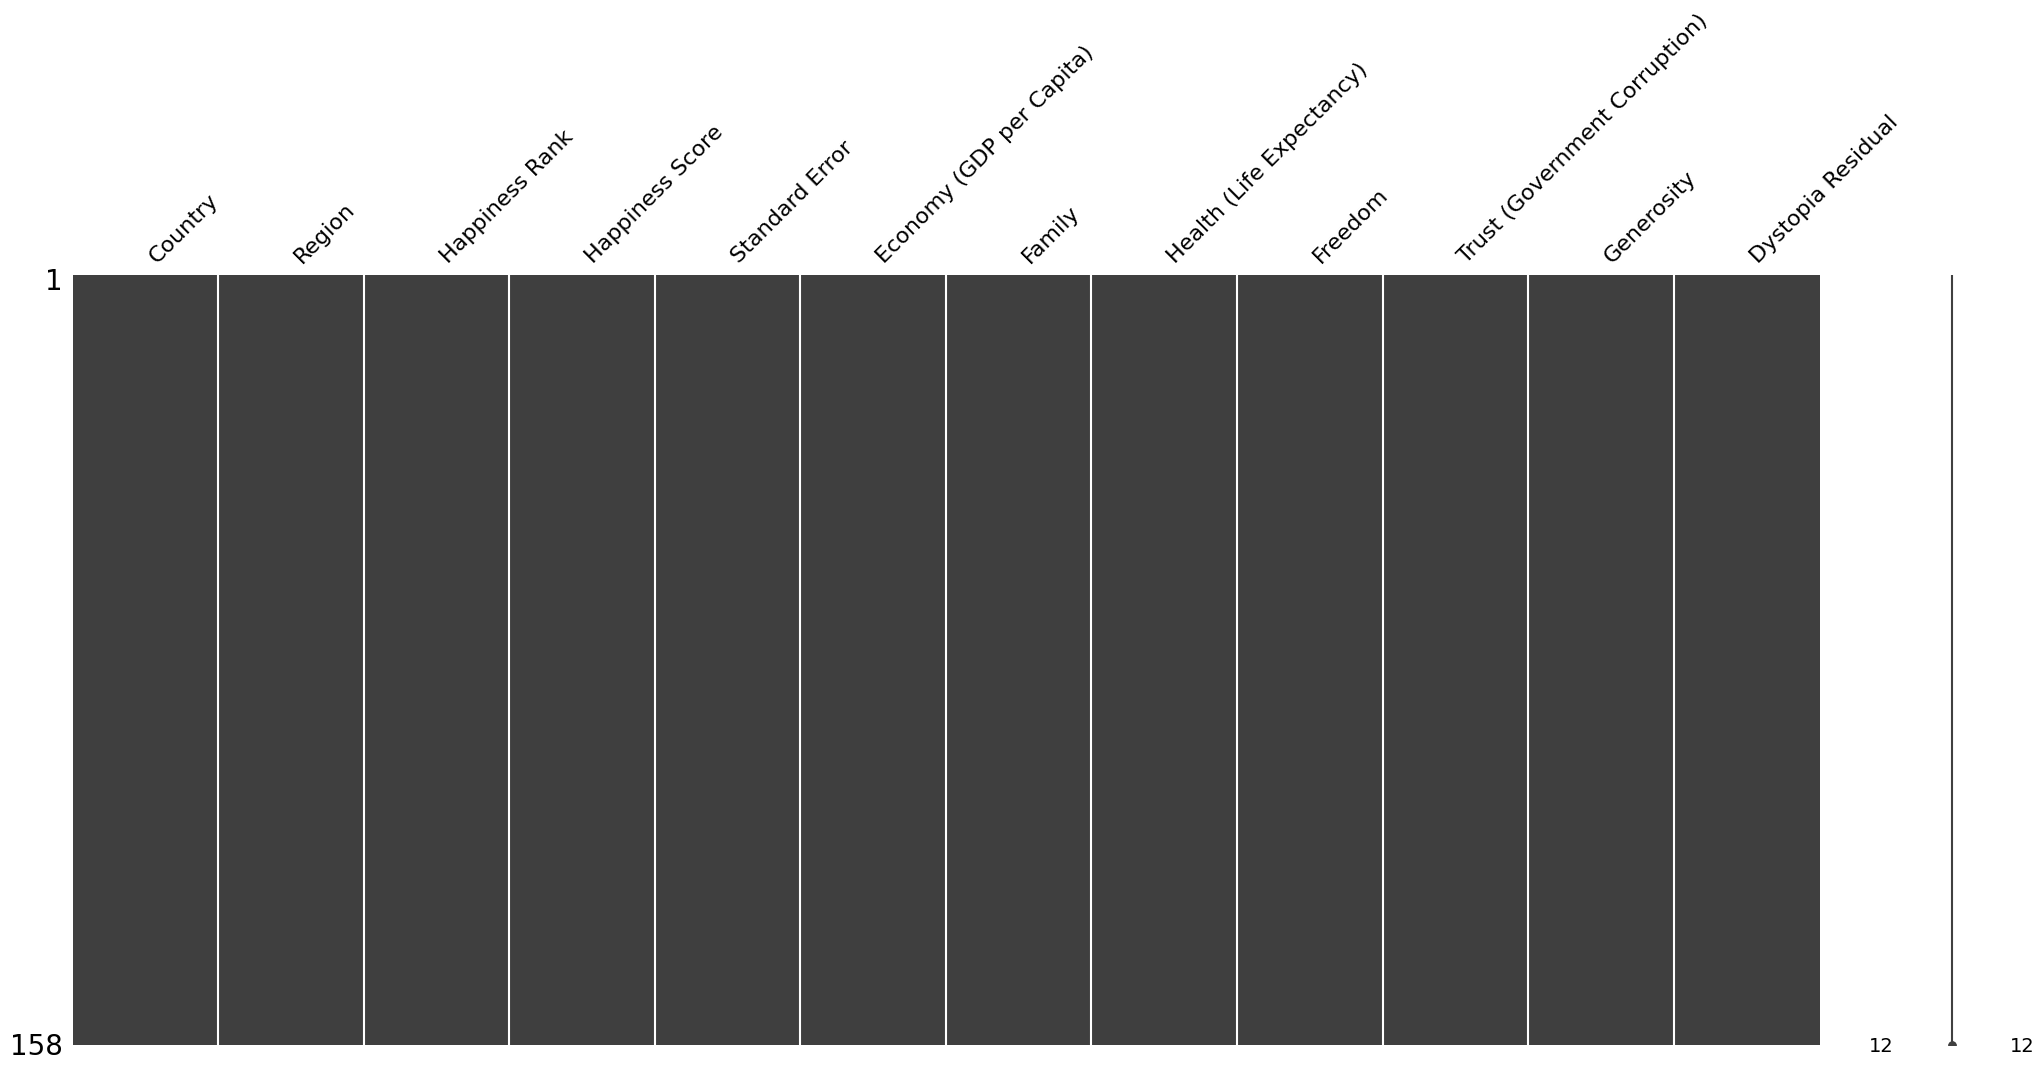

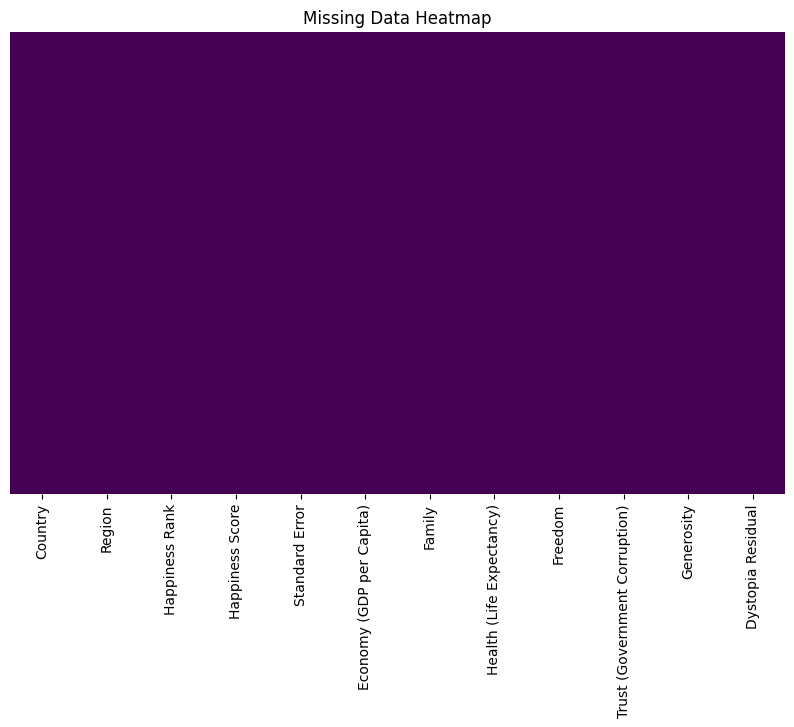

In [11]:
#code implemenation
msno.matrix(df_clean)
plt.show()

#create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False ,xticklabels=df.columns)
plt.title('Missing Data Heatmap')
plt.show()

UNDERSTANDING THE DATATYPES OF OUR DATASET

In [12]:
#code implementation
print("Datatype of the column data in the dataset taken:\n" ,df_clean.dtypes)

Datatype of the column data in the dataset taken:
 Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object


DATASET DESCRIPTION

In [13]:
#code implementation
print("Describing the dataset:\n",df_clean.describe())

Describing the dataset:
        Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50%           

VARIABLE DESCRIPTION



In [14]:
#code implementation
print("Describing the unique dataset:\n", df_clean.nunique())

Describing the unique dataset:
 Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64


DATA WRANGLING


In [15]:
# code implementation
print("checking for existence of any duplicate data......")
print("any duplicated data is present or not:",df_clean.duplicated().sum())

# removing duplicate values from the data set
df_clean.drop_duplicates(inplace=True)

# printing the data after removing duplicate values
print("\nShape of the dataset after removing duplicates:", df_clean.shape)

checking for existence of any duplicate data......
any duplicated data is present or not: 0

Shape of the dataset after removing duplicates: (158, 12)


DETECT AND TREAT OUTLIERS

In [16]:
print("detect the outliers in the dataset..........................\n")
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = df_clean[col].median()
    df_clean[col] = np.where((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound), median_value, df_clean[col])
print("detection done")

detect the outliers in the dataset..........................

detection done


SCALING AND NORMALIZATION

In [17]:
print("scaling numerical features.......")
scale_cols = [col for col in numeric_columns if col not in ['Happiness Score', 'Happiness Rank']]
scaler = MinMaxScaler()
df_clean[scale_cols] = scaler.fit_transform(df_clean[scale_cols])
print("scaling done")

scaling numerical features.......
scaling done


ENDECODING CATEGORICAL DATA

In [18]:
print("Encoding categorical features.....")
df_clean = pd.get_dummies(
    df_clean,
    columns=['Country'],
    drop_first=True
)
print("Encoding done")

Encoding categorical features.....
Encoding done


FEATURE ENGINEERING


In [19]:
# code implementation
df_clean['Social Support'] = df_clean['Family'] + df_clean['Generosity']
print("The 'Social Support' column has been added to the dataset.")

The 'Social Support' column has been added to the dataset.


DROPPING UNWANTED DATA COLUMNS

In [20]:
df_clean = df_clean.drop(columns=['Happiness Rank'])
print("The 'Happiness Rank' column has been dropped from the dataset.")


The 'Happiness Rank' column has been dropped from the dataset.


FINAL PROCESSED DATA SET

In [21]:
print("final dataset shape:",df_clean.shape)
df_clean.head()


final dataset shape: (158, 168)


,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,...,Country_United Kingdom,Country_United States,Country_Uruguay,Country_Uzbekistan,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Social Support
0,Western Europe,7.587,0.279207,0.826132,0.949712,0.918244,0.993789,0.300867,0.571698,0.685340,...,False,False,False,False,False,False,False,False,False,1.521411
1,Western Europe,7.561,0.542337,0.770412,1.000000,0.924496,0.938841,0.396919,0.840461,0.763569,...,False,False,False,False,False,False,False,False,False,1.840461
2,Western Europe,7.527,0.264380,0.784113,0.960272,0.853099,0.969615,0.300867,0.657632,0.674603,...,False,False,False,False,False,False,False,False,False,1.617904
3,Western Europe,7.522,0.362987,0.863099,0.932009,0.863409,1.000000,0.300867,0.668420,0.663277,...,False,False,False,False,False,False,False,False,False,1.600428
4,North America,7.427,0.304573,0.784592,0.924054,0.883326,0.945112,0.924797,0.882474,0.657536,...,False,False,False,False,False,False,False,False,False,1.806528


TARGET DISTRIBUTION

In [22]:
# target distribution
df_clean['Happiness Score'].value_counts()

,count
Happiness Score,
5.192,2
7.561,1
7.527,1
7.522,1
7.587,1
...,...
3.465,1
3.340,1
3.006,1


**USING THE DATA FINALLY CREATED TO DEMONSTRATE IN THE FORM OF CHARTS**

VISUAL REPRESENTATION OF HAPPINESS SCORE VS HEALTH

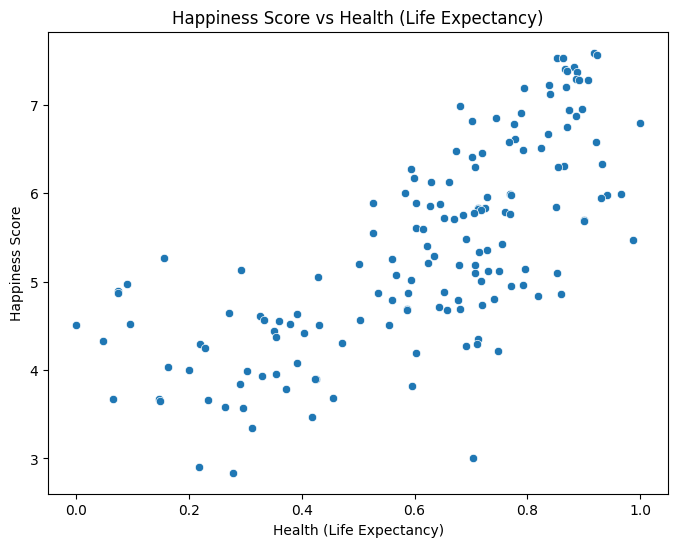

In [23]:
# code implementation to generate a scatter graph
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='Health (Life Expectancy)', y='Happiness Score')
plt.title('Happiness Score vs Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.show()


**Why you chose this scatter plot?**

a. A scatter plot is ideal for:

b. Seeing how one variable changes with another.

c. Identifying patterns, clusters, or outliers.

d. It helps us visually check if better health outcomes
correspond to higher happiness levels across countries.

**What insights you can get from this plot?**

a. Countries with better healthcare and longer life expectancy tend to report higher happiness levels.

b. After a certain point, increased life expectancy may not significantly boost happiness.

c. Some countries with similar health conditions show vastly different happiness scores → prompting further analysis on governance, family support, or inequality.


**VISUAL REPRESENTATION OF GDP AND REGION IN BAR CHART FORMAT**

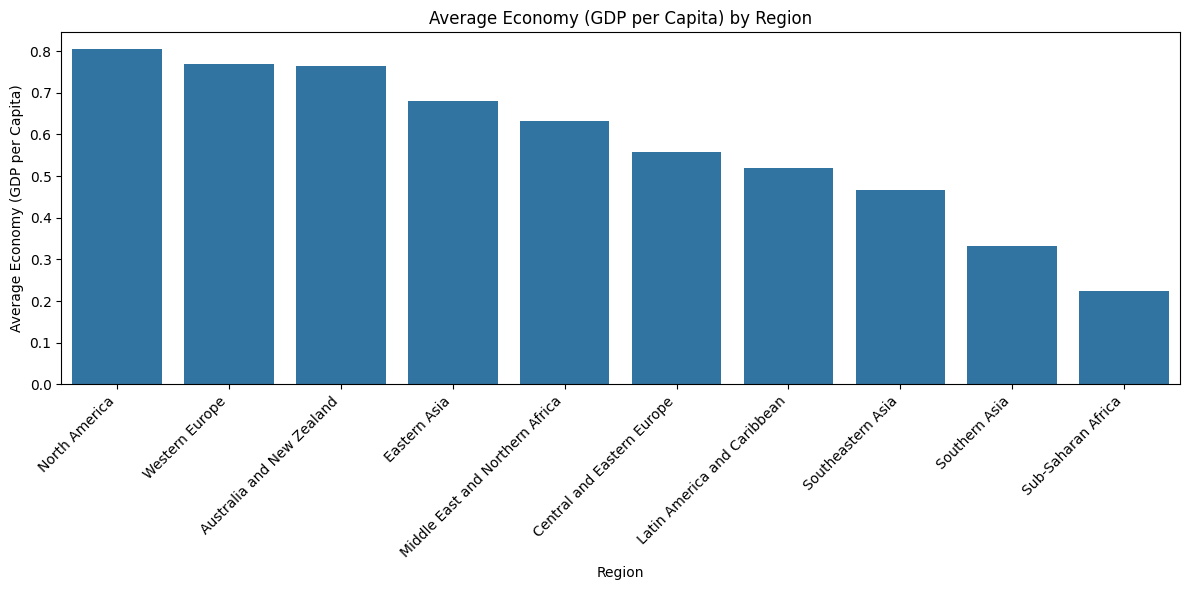

In [24]:
plt.figure(figsize=(12, 6))
region_gdp = df_clean.groupby('Region')['Economy (GDP per Capita)'].mean().sort_values(ascending=False)
sns.barplot(x=region_gdp.index, y=region_gdp.values)
plt.xticks(rotation=45, ha='right')
plt.title('Average Economy (GDP per Capita) by Region')
plt.xlabel('Region')
plt.ylabel('Average Economy (GDP per Capita)')
plt.tight_layout()
plt.show()

**Why you chose this plot?**

1. Groups the dataset by Region.

2. Calculates the average GDP per capita for each region.

3. Sorts the regions from highest to lowest average GDP.

**What are the key insights we can derive from this plot?**

1. Which regions are wealthier

2. Economic disparity

3. Potential correlation with happiness

4. Focus areas for policy or aid

VISUAL REPRESENTATION OF CORRELATION HEATMAP

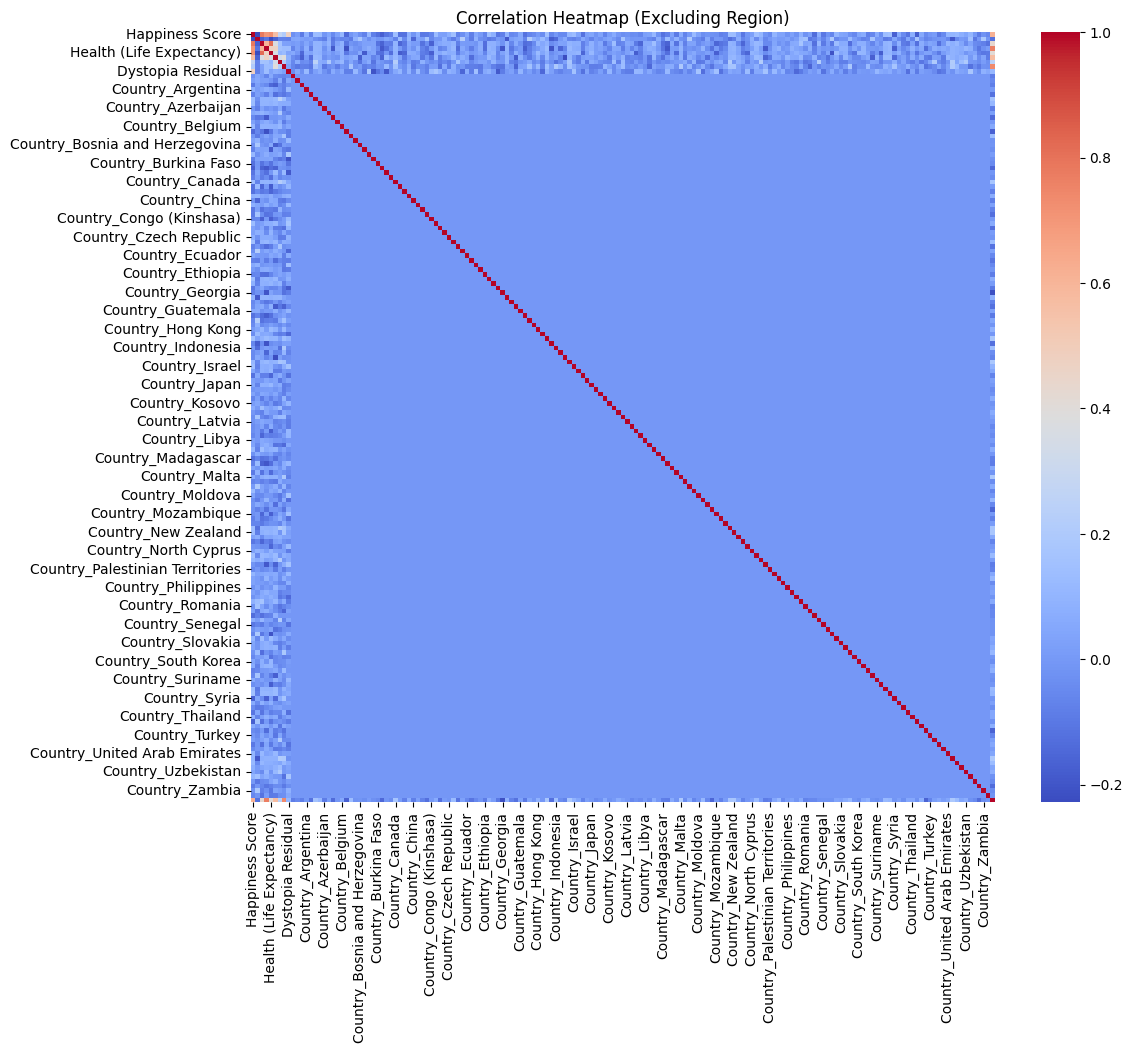

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix, excluding the 'Region' column
corr = df_clean.drop(columns=['Region']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Excluding Region)")
plt.show()

Why you chose this plot?

1. Identify relationships between variables
2. Avoid non-numeric columns
3. Visualize the strength of relationships

What are key insights that we can derive from this heatmap?
1. Which features are strongly related
2. Unexpected patterns
3. Multicollinearity
4. Areas for deeper investigation

VISUAL REPRESENTATION OF CHOROPLETH MAP

In [32]:
import plotly.express as px

fig = px.choropleth(df, locations="Country",
                    locationmode="country names",
                    color="Happiness Score",
                    title="World Happiness Score by Country")
fig.show()

Why you chose this plot?
1. Geographical visualization
2. Identify patterns or clusters
3. Interactive exploration

What are key insights that we can derive from this Choropleth map?
1. Which countries are happiest or unhappiest
2. Regional patterns
3. Identify outliers or anomalies
4. Support for policymaking

VISUAL REPRESENTATION OF COUNTRIES PRESENT IN A REGION

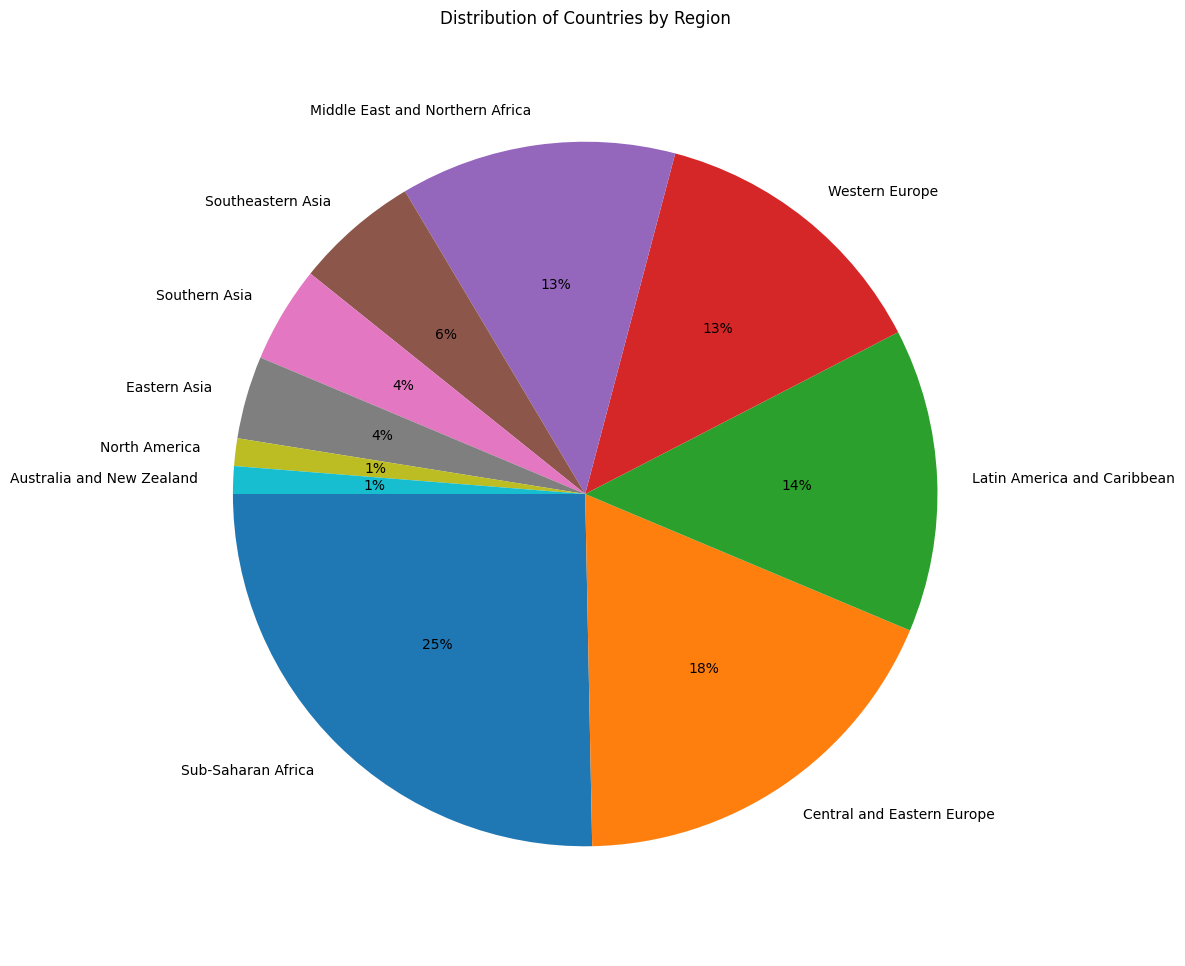

In [27]:
# Count the number of countries in each region
region_counts = df_clean['Region'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 12))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.0f%%', startangle=180)
plt.title('Distribution of Countries by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Why you chose this plot?
1. Understand distribution
2. Proportional representation
3. Exploratory Data Analysis (EDA)

What are the key insights that we can derive from this plot?
1. Which regions dominate the dataset
2. Sampling bias
3. Comparative understanding

**CONCLUSION:-**

After analyzing the World Happiness Index dataset, several important insights and conclusions have been drawn from the exploratory data analysis and visualizations:

📊**Key Findings**

**Global Happiness Patterns**

Countries with higher GDP per capita, life expectancy, and freedom tend to report higher happiness scores.

Economic strength plays a significant role in contributing to well-being, but it is not the only factor.

**Impact of Social Support and Trust**

Regions with stronger family support and trust in government often show higher levels of happiness.

Societal factors like generosity and community support complement economic conditions in shaping happiness.

**Geographical Disparities**

The choropleth map and region distribution pie chart highlighted that wealth and happiness are unevenly spread across continents.

Some regions, such as Western Europe and North America, have higher happiness scores, while others face structural challenges.

**Correlations and Relationships**

The correlation heatmap confirmed expected relationships between happiness and economic, health, and freedom indicators.

Some features are highly interrelated, suggesting multicollinearity, which should be considered when modeling.

**Outliers and Unique Cases**

Scatterplots revealed that some countries defy trends, having either high happiness despite lower economic conditions or vice versa.

These outliers point to cultural, political, or governance factors beyond measurable statistics.

**Final Insights**

Happiness is multifactorial — while economic prosperity plays a critical role, factors like health, freedom, social trust, and generosity are equally important.

Data-driven approaches can identify patterns and relationships but should be complemented by qualitative research to explain unique country-level differences.

Visualizations like choropleth maps, correlation heatmaps, and scatterplots are powerful tools for communicating findings and uncovering trends.

